<a href="https://colab.research.google.com/github/Nuzhattttt/braintumor/blob/main/vgg%2Cresnet_and_densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from PIL import Image


In [ ]:

train_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Training'
test_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Testing'

In [ ]:
image_size = (224, 224)
train_images = []
train_labels = []
test_images = []
test_labels = []

In [ ]:
def load_and_preprocess_images(directory, images_list, labels_list):
    for class_name in os.listdir(directory):
        class_directory = os.path.join(directory, class_name)

        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path).convert("RGB")
                image = image.resize(image_size, Image.LANCZOS)
                images_list.append(image)
                labels_list.append(class_name)


In [ ]:
load_and_preprocess_images(train_directory, train_images, train_labels)


In [ ]:
load_and_preprocess_images(test_directory, test_images, test_labels)


In [ ]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [ ]:
# # Assuming your images are in RGB format
# X_train = X_train.reshape(-1, 224, 224, 3)
# X_test = X_test.reshape(-1, 224, 224, 3)


In [ ]:
# image_size = (224, 224)

# # Reshape and resize the images
# X_train = np.array([np.array(img.resize(image_size)) for img in train_images])
# X_test = np.array([np.array(img.resize(image_size)) for img in test_images])

In [ ]:
from keras.utils import to_categorical

In [ ]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [ ]:
from keras.utils import to_categorical

In [ ]:
# label_encoder = LabelEncoder()
num_classes = 4
y_train = to_categorical(train_encoded_labels, num_classes=num_classes)
y_test = to_categorical(test_encoded_labels, num_classes=num_classes)

# train_encoded_labels = label_encoder.fit_transform(train_labels)
# test_encoded_labels = label_encoder.transform(test_labels)

In [ ]:
X_train = np.array([np.array(img) for img in train_images])
y_train = np.array(train_encoded_labels)
X_test = np.array([np.array(img) for img in test_images])
y_test = np.array(test_encoded_labels)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5722, 224, 224, 3)
y_train shape: (5722,)
X_test shape: (1311, 224, 224, 3)
y_test shape: (1311,)


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import time
from keras.layers import Activation
from keras.layers import Dropout


In [ ]:
# # model_CNN = tf.keras.Sequential()
# # model_CNN.add(layers.InputLayer(input_shape=(128, 128, 3)))

# # model_CNN.add(layers.Conv2D(32, (5, 5), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(64, (4, 4), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(256, (2, 2), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Flatten())
# # model_CNN.add(layers.Dense(2048, activation='relu'))
# # model_CNN.add(layers.Dropout(0.25))
# # model_CNN.add(layers.Dense(4, activation='softmax'))

# # optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
# # model_CNN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# class VGG16:

#     def build(shape, classes):
#         model_CNN = Sequential()
#         model_CNN.add(Conv2D(input_shape=shape,filters=32,kernel_size=(3,3),padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Flatten())
#         model_CNN.add(Dense(units=4096,activation="relu"))
#         model_CNN.add(Dense(units=4096,activation="relu"))
#         model_CNN.add(Dense(units=classes, activation="softmax"))
#         return model_CNN


# build the network
num_classes = 4
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()# build the network
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                  

In [ ]:
# # compile the model to use categorical cross-entropy loss function and adadelta optimizer
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=1,
#                     validation_data=(X_test, y_test))

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))





Epoch 1/50
90/90 [==============================] - 22s 141ms/step - loss: 7.6939 - accuracy: 0.5178 - val_loss: 0.8733 - val_accuracy: 0.6667
Epoch 2/50
90/90 [==============================] - 11s 126ms/step - loss: 0.7588 - accuracy: 0.6945 - val_loss: 0.6484 - val_accuracy: 0.7498
Epoch 3/50
90/90 [==============================] - 12s 129ms/step - loss: 0.6473 - accuracy: 0.7541 - val_loss: 0.5940 - val_accuracy: 0.7857
Epoch 4/50
90/90 [==============================] - 11s 125ms/step - loss: 0.5572 - accuracy: 0.7789 - val_loss: 0.4990 - val_accuracy: 0.8162
Epoch 5/50
90/90 [==============================] - 11s 127ms/step - loss: 0.4770 - accuracy: 0.8179 - val_loss: 0.4425 - val_accuracy: 0.8139
Epoch 6/50
90/90 [==============================] - 11s 128ms/step - loss: 0.4357 - accuracy: 0.8341 - val_loss: 0.3889 - val_accuracy: 0.8452
Epoch 7/50
90/90 [==============================] - 12s 128ms/step - loss: 0.3982 - accuracy: 0.8429 - val_loss: 0.3484 - val_accuracy: 0.8574

In [ ]:
predictions = model.predict(X_test)

41/41 [==============================] - 1s 10ms/step


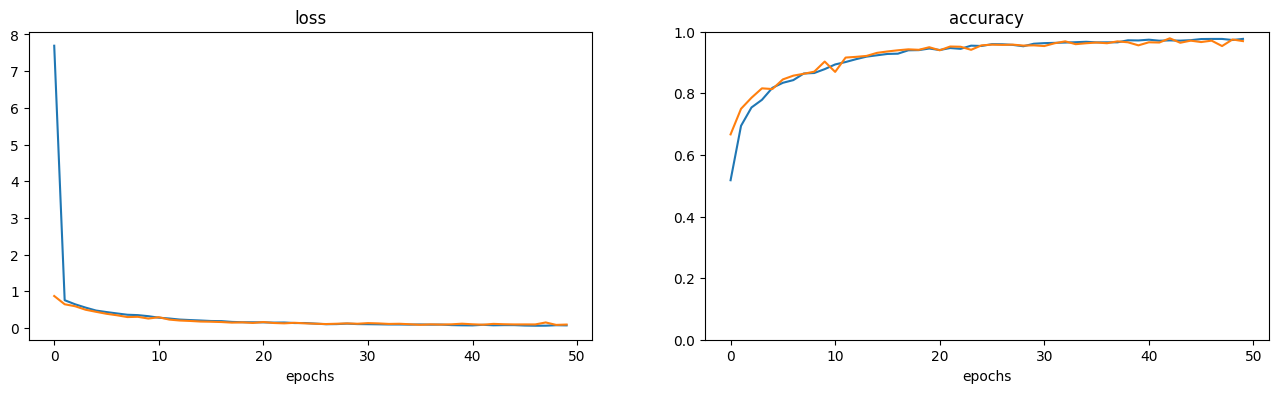

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["loss"])
ax.plot(history.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["accuracy"])
ax2.plot(history.history["val_accuracy"])
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Test loss: 0.09521365910768509
Test accuracy: 0.9694889187812805


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

vgg = VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_vgg = Model(inp, out)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_vgg.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_vgg.layers[-1:]):
    layer.trainable = True

model_vgg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history4 = model_vgg.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                         batch_size=64,
                         epochs=50,
                         validation_data=(X_test,to_categorical(test_encoded_labels, num_classes=num_classes)))

Epoch 1/50
90/90 [==============================] - 63s 542ms/step - loss: 0.4910 - accuracy: 0.8177 - val_loss: 0.4285 - val_accuracy: 0.8421
Epoch 2/50
90/90 [==============================] - 33s 368ms/step - loss: 0.2781 - accuracy: 0.8983 - val_loss: 0.3300 - val_accuracy: 0.8841
Epoch 3/50
90/90 [==============================] - 34s 378ms/step - loss: 0.2290 - accuracy: 0.9198 - val_loss: 0.3029 - val_accuracy: 0.8947
Epoch 4/50
90/90 [==============================] - 34s 382ms/step - loss: 0.1802 - accuracy: 0.9364 - val_loss: 0.3328 - val_accuracy: 0.8665
Epoch 5/50
90/90 [==============================] - 30s 339ms/step - loss: 0.1506 - accuracy: 0.9505 - val_loss: 0.2046 - val_accuracy: 0.9252
Epoch 6/50
90/90 [==============================] - 36s 397ms/step - loss: 0.1353 - accuracy: 0.9553 - val_loss: 0.2140 - val_accuracy: 0.9138
Epoch 7/50
90/90 [==============================] - 31s 349ms/step - loss: 0.1124 - accuracy: 0.9659 - val_loss: 0.2153 - val_accuracy: 0.9298

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical


In [ ]:
predictions = model_vgg.predict(X_test)

# Convert predictions and test labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(to_categorical(test_encoded_labels, num_classes=num_classes), axis=1)


41/41 [==============================] - 13s 138ms/step


In [ ]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       300
           1       0.90      0.96      0.93       306
           2       0.99      1.00      1.00       405
           3       0.98      0.97      0.98       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



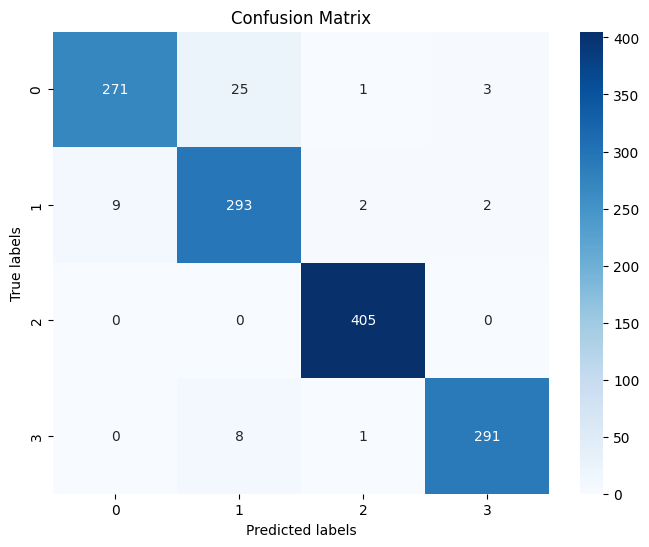

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

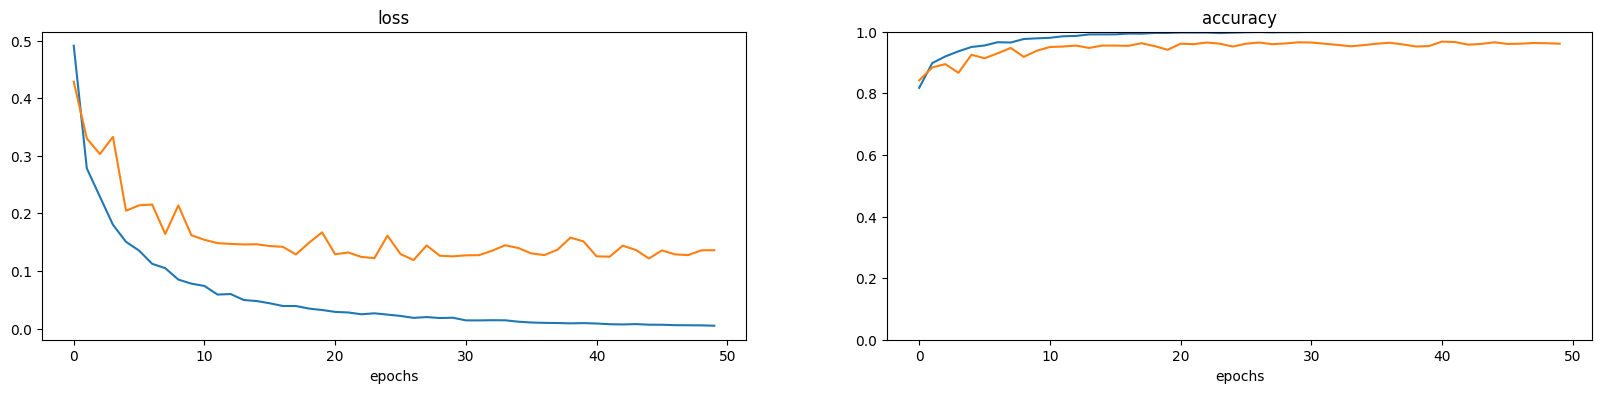

In [ ]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.plot(history4.history["loss"])
ax.plot(history4.history["val_loss"])

ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history4.history["accuracy"])
ax2.plot(history4.history["val_accuracy"])
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_vgg.evaluate(X_test, to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.13608399033546448
Test accuracy: 0.9610983729362488


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

rn = ResNet50(weights='imagenet', include_top=True)
rn.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

In [ ]:
# make a reference to VGG's input layer
inp = rn.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(rn.layers[-2].output)

# create a new network between inp and out
model_rn = Model(inp, out)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_rn.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_rn.layers[-1:]):
    layer.trainable = True

model_rn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_rn.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
history5 = model_rn.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                         batch_size=256,
                         epochs=50,
                         validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))

Epoch 1/50
23/23 [==============================] - 43s 1s/step - loss: 0.9982 - accuracy: 0.6014 - val_loss: 0.6591 - val_accuracy: 0.7651
Epoch 2/50
23/23 [==============================] - 21s 936ms/step - loss: 0.4751 - accuracy: 0.8352 - val_loss: 0.5137 - val_accuracy: 0.8101
Epoch 3/50
23/23 [==============================] - 22s 954ms/step - loss: 0.3581 - accuracy: 0.8801 - val_loss: 0.4383 - val_accuracy: 0.8421
Epoch 4/50
23/23 [==============================] - 22s 970ms/step - loss: 0.3051 - accuracy: 0.9011 - val_loss: 0.3867 - val_accuracy: 0.8589
Epoch 5/50
23/23 [==============================] - 23s 987ms/step - loss: 0.2752 - accuracy: 0.9063 - val_loss: 0.3538 - val_accuracy: 0.8703
Epoch 6/50
23/23 [==============================] - 23s 1s/step - loss: 0.2525 - accuracy: 0.9131 - val_loss: 0.3446 - val_accuracy: 0.8719
Epoch 7/50
23/23 [==============================] - 23s 1s/step - loss: 0.2407 - accuracy: 0.9159 - val_loss: 0.3190 - val_accuracy: 0.8780
Epoch 8/

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical

In [ ]:
predictions = model_rn.predict(X_test)

# Convert predictions and test labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(to_categorical(test_encoded_labels, num_classes=num_classes), axis=1)

41/41 [==============================] - 4s 96ms/step


In [ ]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       300
           1       0.92      0.91      0.91       306
           2       0.98      1.00      0.99       405
           3       0.96      0.98      0.97       300

    accuracy                           0.96      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311



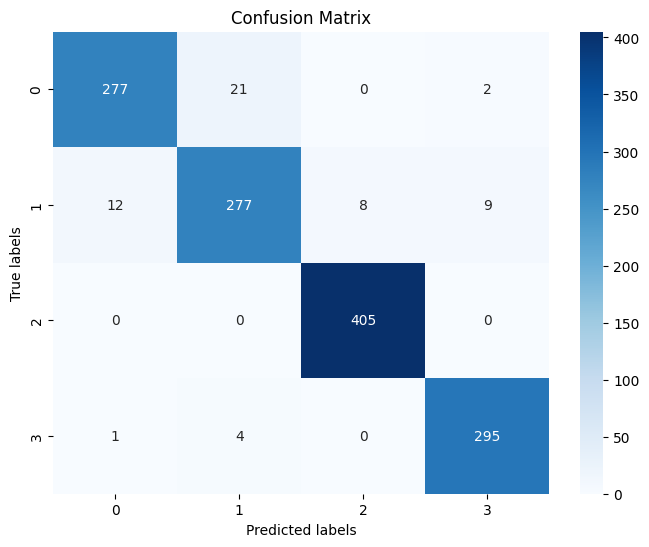

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

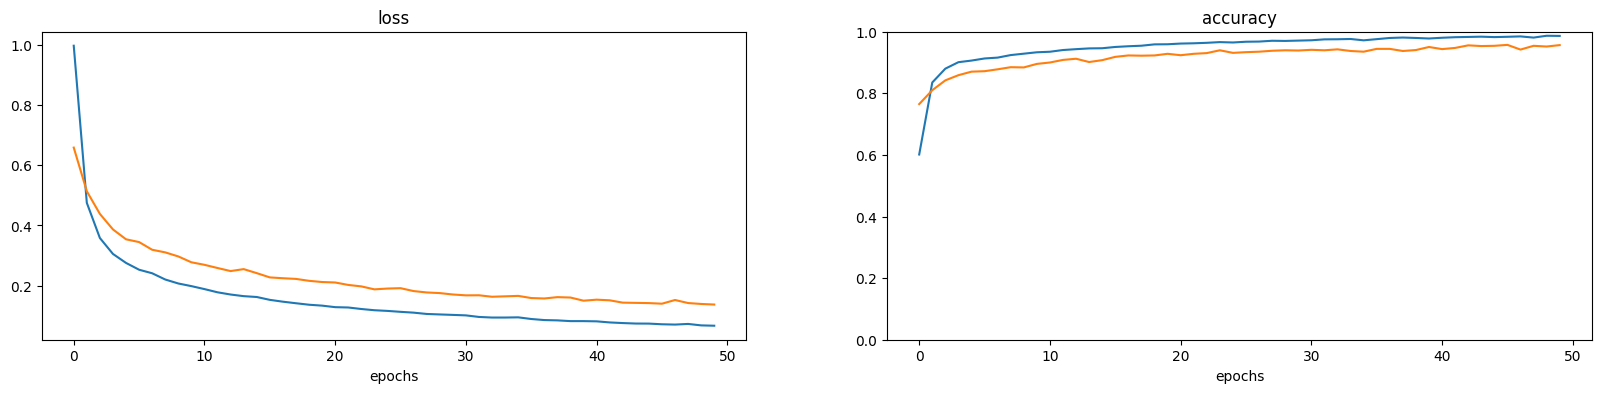

In [ ]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.plot(history5.history["loss"])
ax.plot(history5.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history5.history["accuracy"])
ax2.plot(history5.history["val_accuracy"])
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_rn.evaluate(X_test, to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.13720688223838806
Test accuracy: 0.9496567249298096


In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.preprocessing import image
from keras.applications.densenet import decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

den = DenseNet121(weights='imagenet', include_top=True)
den.summary()

33188688/33188688 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormali

In [ ]:
# make a reference to MobileNets's input layer
inp = den.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in MobileNets, and make a reference to it
out = new_classification_layer(den.layers[-2].output)

# create a new network between inp and out
model_den = Model(inp, out)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_den.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_den.layers[-1:]):
    layer.trainable = True

model_den.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_den.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

In [ ]:
history6 = model_den.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                         batch_size=64,
                         epochs=50,
                         validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))

Epoch 1/50
90/90 [==============================] - 41s 320ms/step - loss: 1.0267 - accuracy: 0.5980 - val_loss: 0.9009 - val_accuracy: 0.6812
Epoch 2/50
90/90 [==============================] - 21s 229ms/step - loss: 0.6312 - accuracy: 0.7679 - val_loss: 0.7127 - val_accuracy: 0.7391
Epoch 3/50
90/90 [==============================] - 19s 214ms/step - loss: 0.5319 - accuracy: 0.8036 - val_loss: 0.6267 - val_accuracy: 0.7780
Epoch 4/50
90/90 [==============================] - 21s 236ms/step - loss: 0.4674 - accuracy: 0.8375 - val_loss: 0.5957 - val_accuracy: 0.7918
Epoch 5/50
90/90 [==============================] - 20s 227ms/step - loss: 0.4228 - accuracy: 0.8515 - val_loss: 0.5127 - val_accuracy: 0.8192
Epoch 6/50
90/90 [==============================] - 22s 240ms/step - loss: 0.3918 - accuracy: 0.8691 - val_loss: 0.5074 - val_accuracy: 0.8268
Epoch 7/50
90/90 [==============================] - 21s 238ms/step - loss: 0.3608 - accuracy: 0.8756 - val_loss: 0.4721 - val_accuracy: 0.8375

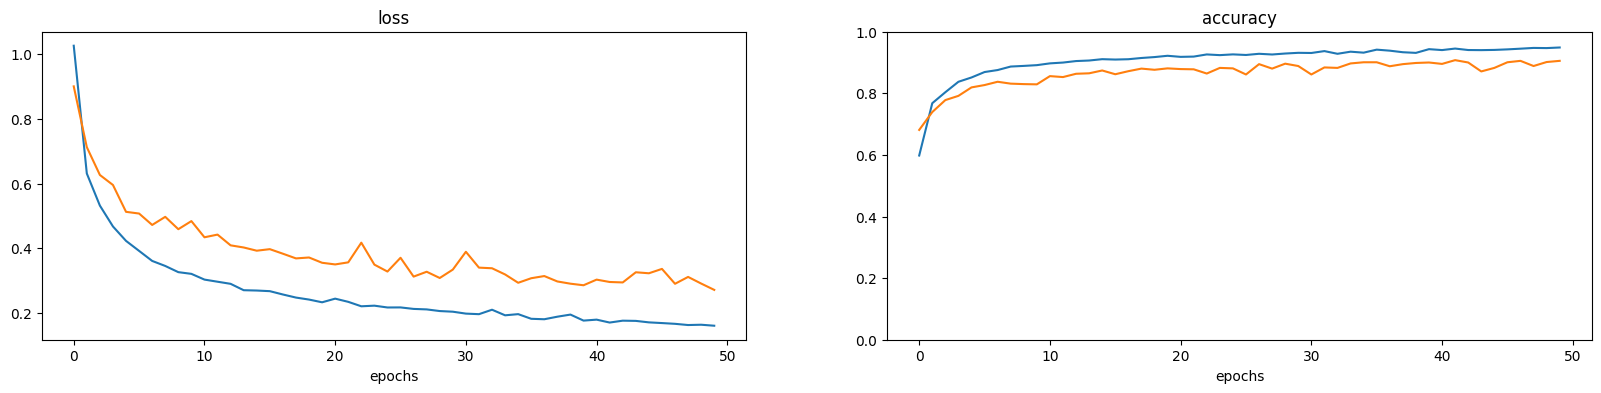

In [ ]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.plot(history6.history["loss"])
ax.plot(history6.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history6.history["accuracy"])
ax2.plot(history6.history["val_accuracy"])
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_den.evaluate(X_test, to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.2711530327796936
Test accuracy: 0.9054157137870789


In [ ]:
predictions = model_den.predict(X_test)

# Convert predictions and test labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(to_categorical(test_encoded_labels, num_classes=num_classes), axis=1)

41/41 [==============================] - 5s 85ms/step


In [ ]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       300
           1       0.80      0.82      0.81       306
           2       0.97      0.98      0.97       405
           3       0.93      0.97      0.95       300

    accuracy                           0.91      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.91      0.91      0.90      1311



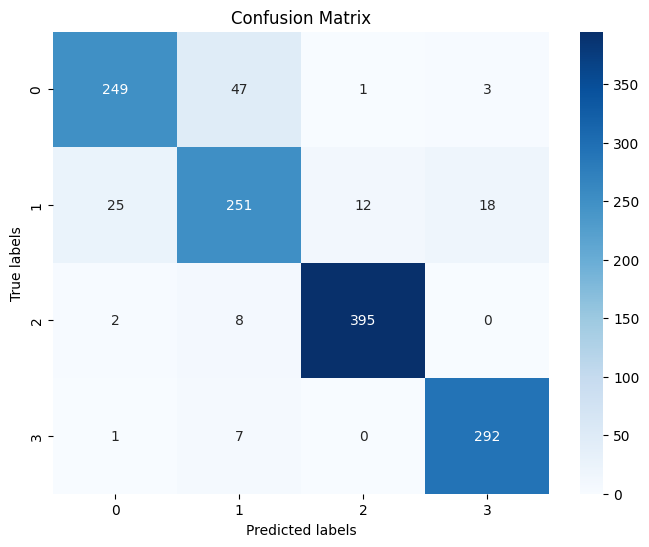

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()